## Assignment 2 DSC 478 
### Kevin Thompson
#### Part B

In [ ]:
#load libraries libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn


In [81]:
df = pd.read_csv("C:/Users/19148/Downloads/adult-modified1.csv") #import data
df.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


### Prepare data

In [338]:
df_null = df.isnull()
np.unique(df_null.to_numpy()) #no missing values

array([False])

In [82]:
for i in df:
    x = (df[i].unique())
    print(np.sort(x)) # no missing values

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 90]
['Private' 'Public' 'Self-emp']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
['Married' 'Single']
['Amer-Indian' 'Asian' 'Black' 'Hispanic' 'White']
['Female' 'Male']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 68 70 72 73 75 77 78
 80 84 85 87 88 89 90 94 97 98 99]
['<=50K' '>50K']


There is no missing or null data

In [83]:
df_dummies = pd.get_dummies(df, dtype = int) # create dummy variables 
df_dummies.shape

(9412, 17)

In [84]:
target_df = df_dummies['income_>50K'] #create a new dataframe with our target attribute
target_df.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: int32

In [85]:
df_dummies_drop=df_dummies.drop(['income_>50K','income_<=50K'],axis = 'columns') #drop income columns since they'll be our labels
df_dummies_drop.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [86]:
from sklearn.model_selection import train_test_split #split test and training
X_train,X_test,y_train, y_test = train_test_split(df_dummies_drop,target_df, test_size=.2, random_state=42)

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((7529, 15), (1883, 15), (7529,), (1883,))

In [87]:
#apply minmax normalization
X_train['age'] = X_train['age']/X_train['age'].abs().max()
X_train['education'] = X_train['education']/X_train['education'].abs().max()
X_train['hours-per-week'] = X_train['hours-per-week']/X_train['hours-per-week'].abs().max()

X_train.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8977,0.555556,0.5625,0.353535,1,0,0,0,1,0,0,0,0,1,1,0
8143,0.400000,0.8125,0.454545,0,0,1,0,1,0,0,1,0,0,0,1
6717,0.266667,0.6250,0.404040,1,0,0,0,1,0,0,0,0,1,0,1
2132,0.533333,0.5625,0.404040,1,0,0,1,0,0,0,0,0,1,0,1
1509,0.600000,0.5625,0.404040,1,0,0,1,0,0,0,0,0,1,0,1


In [88]:
#normalize the data using min max normalization

X_test['age'] = X_test['age']/X_test['age'].abs().max()
X_test['education'] = X_test['education']/X_test['education'].abs().max()
X_test['hours-per-week'] = X_test['hours-per-week']/X_test['hours-per-week'].abs().max()

X_test.head()


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8320,0.333333,0.6250,0.404040,1,0,0,0,1,0,1,0,0,0,1,0
8126,0.333333,0.5625,0.464646,1,0,0,1,0,0,0,0,0,1,0,1
1298,0.411111,0.5625,0.444444,1,0,0,0,1,0,0,1,0,0,0,1
9093,0.344444,0.4375,0.404040,1,0,0,1,0,0,0,0,0,1,0,1
8457,0.422222,0.6250,0.202020,1,0,0,0,1,0,1,0,0,0,0,1


In [116]:
#convert to numpy arrays
train = X_train.to_numpy()
test = X_test.to_numpy()
lab_train = y_train.to_numpy()
lab_test = y_test.to_numpy()

Now the data is ready for KNN 

#### KNN Classification

In [120]:
#KNN Classification with sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
correctTrain = 0
predicted = []
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train,lab_train)
for i in range(len(train)):
    if neigh.predict([train[i]]) == lab_train[i]:
        correctTrain+=1
        predicted.append(neigh.predict([train[i]]))
    else:
        predicted.append(neigh.predict([train[i]]))
correctTrain/len(train)


0.8372957896134945

83% success rate is pretty high but not too high which is a good sign for overfitting.

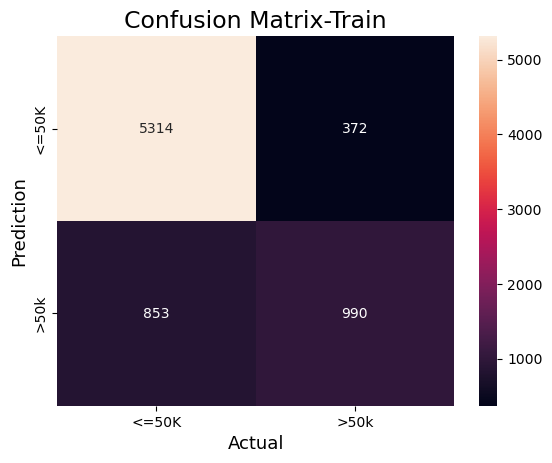

In [128]:
#create confusion matrix
predicted = np.array(predicted)
cm = confusion_matrix(lab_train,predicted)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['<=50K','>50k'],
            yticklabels=['<=50K','>50k'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix-Train',fontsize=17)
plt.show()


In [136]:
#classification report
from sklearn.metrics import classification_report
y_true = lab_train
y_pred = predicted
target_names = ["<=50k",">50k"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50k       0.86      0.93      0.90      5686
        >50k       0.73      0.54      0.62      1843

    accuracy                           0.84      7529
   macro avg       0.79      0.74      0.76      7529
weighted avg       0.83      0.84      0.83      7529



f1 score of .84 for total accuracy

In [130]:
#test model on test data
correctTest = 0
predictedTest = []
for i in range(len(test)):
    if neigh.predict([test[i]]) == lab_test[i]:
        correctTest+=1
        predictedTest.append(neigh.predict([test[i]]))
    else:
        predictedTest.append(neigh.predict([test[i]]))
    
correctTest/len(test)



0.807222517259692

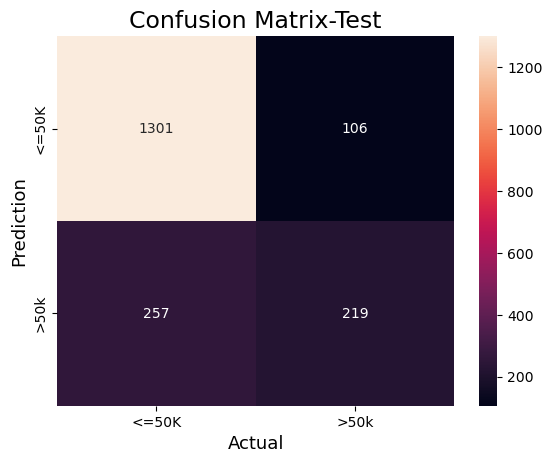

In [133]:
#confusion matrix for test set
predictedTest = np.array(predictedTest)
cmTest = confusion_matrix(lab_test,predictedTest)

sns.heatmap(cmTest, 
            annot=True,
            fmt='g', 
            xticklabels=['<=50K','>50k'],
            yticklabels=['<=50K','>50k'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix-Test',fontsize=17)
plt.show()

In [135]:
#classification report for test set
from sklearn.metrics import classification_report
y_true = lab_test
y_pred = predictedTest
target_names = ["<=50k",">50k"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50k       0.84      0.92      0.88      1407
        >50k       0.67      0.46      0.55       476

    accuracy                           0.81      1883
   macro avg       0.75      0.69      0.71      1883
weighted avg       0.79      0.81      0.79      1883



f1 score of .81 for total accuracy

In [187]:
#test different values of K for uniform weight on training set 
bestKNN = {}
#uniform weight
for i in range(5,105,5):
    correctTrain2 = 0
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train,lab_train)
    for a in range(len(train)):
        if neigh.predict([train[a]]) == lab_train[a]:
            correctTrain2+=1
    percentCorrect = correctTrain2/len(train)
    bestKNN.update({i:percentCorrect})
    


In [166]:
#test different values of K for distance weight on training set
bestKNN = {}
#distance weight
for i in range(5,105,5):
    correctTrain2 = 0
    neigh = KNeighborsClassifier(n_neighbors=i, weights = "distance")
    neigh.fit(train,lab_train)
    for a in range(len(train)):
        if neigh.predict([train[a]]) == lab_train[a]:
            correctTrain2+=1
    percentCorrect = correctTrain2/len(train)
    bestKNN.update({i:percentCorrect})
    


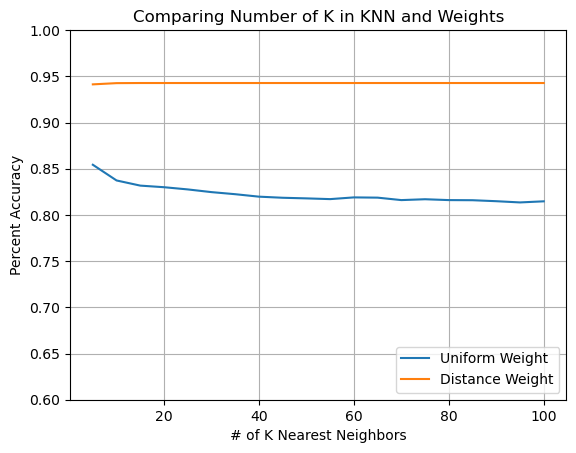

In [160]:
#plot the two weights to compare
plt.plot(bestKNN.keys(),bestKNN.values(), label = "Uniform Weight")
plt.plot(bestDistanceKNN.keys(),bestDistanceKNN.values(), label = "Distance Weight")
plt.xlabel("# of K Nearest Neighbors")
plt.ylabel("Percent Accuracy")
plt.title("Comparing Number of K in KNN and Weights")
plt.ylim(.6,1.0)
plt.grid(True)
plt.legend(loc = 'lower right')


The distance weight seems very strange to me. The same percent correct was seen for almost every value of K which seems very strange. However, if the further away a neighbor is means it is less significant, then getting further and further out shouldn't change the accuracy much as the further neighbors are less important. It would be interesting to see how this works from k=1 to k=5. Because from 5-100 K, it is almost completely horizontal with no variance when K changes. 

In [181]:
#test different values of K for uniform weight on test set
bestKNNTest = {}
#uniform weight
for i in range(5,105,5):
    correctTest = 0
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(test,lab_test)
    for a in range(len(test)):
        if neigh.predict([test[a]]) == lab_test[a]:
            correctTest+=1
    percentCorrectTest = correctTest/len(test)
    bestKNNTest.update({i:percentCorrectTest})
    


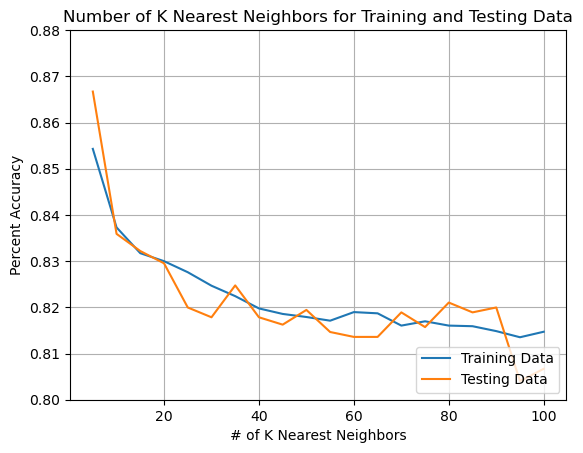

In [195]:
#compare training and test sets for uniform weight
plt.plot(bestKNN.keys(),bestKNN.values(), label = "Training Data")
plt.plot(bestKNNTest.keys(),bestKNNTest.values(), label = "Testing Data")
plt.xlabel("# of K Nearest Neighbors")
plt.ylabel("Percent Accuracy")
plt.title("Number of K Nearest Neighbors for Training and Testing Data")
plt.ylim(.80,.88)
plt.grid(True)
plt.legend(loc = 'lower right')

plt.show()


Very low values of K show overfitting. We can see overfitting when there are very low error rates and high variance. The biggest jump is low numbers of (<10). So I would say somewhere around 10-20 would be a good K to use as it doesn't seem common to use very large numbers of K. However, the variance is a lot lower with K around 25-80. It's also interesting to note that the training data is a lot smoother. One way to deal with overfitting is to use more data and obviously the training data is 4X the amount of data

#### Decision Trees

In [196]:
from sklearn import neighbors, tree, naive_bayes

In [234]:
X_train1,X_test1,y_train1, y_test1 = train_test_split(df_dummies_drop,target_df, test_size=.2, random_state=42) #I have to resplit the data because I didn't make a new dataframe with the normalized data
X_train1,X_test1,y_train1, y_test1 = X_train1.to_numpy(),X_test1.to_numpy(),y_train1.to_numpy(), y_test1.to_numpy()

In [243]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(X_train1, y_train1)


In [244]:
print (treeclf.score(X_train1, y_train1))

0.9427546818966662


In [245]:
print (treeclf.score(X_test1, y_test1))

0.7519915029208709


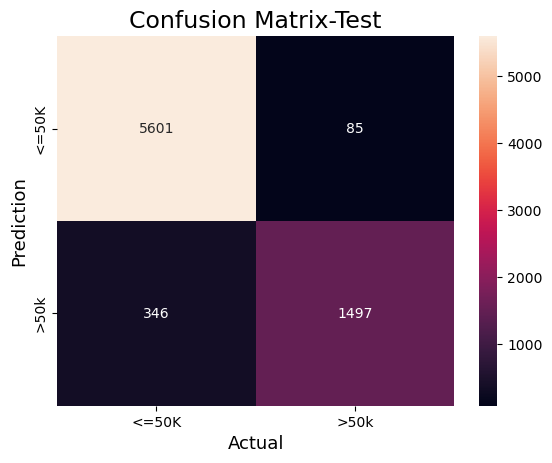

In [256]:
correctTreeTrain = 0
predictedTrainTree = []

for i in range(len(X_train1)):
    x = treeclf.predict([X_train1[i]])
    if x == y_train1[i]:
        correctTreeTrain += 1
        predictedTrainTree.append(x)
    else:
        predictedTrainTree.append(x)
        

#confusion matrix for train set
predictedTrainTree = np.array(predictedTrainTree)
cmTest = confusion_matrix(y_train1,predictedTrainTree)

sns.heatmap(cmTest, 
            annot=True,
            fmt='g', 
            xticklabels=['<=50K','>50k'],
            yticklabels=['<=50K','>50k'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix-Train Decision Tree',fontsize=17)
plt.show()

In [257]:
#classification report for train set
y_true = y_train1
y_pred = predictedTrainTree
target_names = ["<=50k",">50k"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50k       0.94      0.99      0.96      5686
        >50k       0.95      0.81      0.87      1843

    accuracy                           0.94      7529
   macro avg       0.94      0.90      0.92      7529
weighted avg       0.94      0.94      0.94      7529



f1 of .94 which is very high

0.7519915029208709


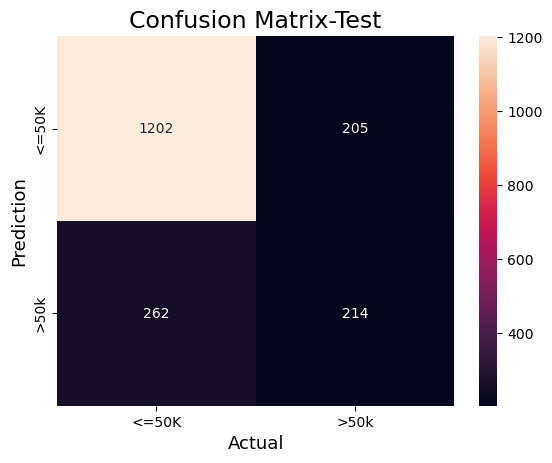

In [252]:
correctTreeTest = 0
predictedTestTree = []

for i in range(len(X_test1)):
    x = treeclf.predict([X_test1[i]])
    if x == y_test1[i]:
        correctTreeTest += 1
        predictedTestTree.append(x)
    else:
        predictedTestTree.append(x)
        

#confusion matrix for test set
predictedTestTree = np.array(predictedTestTree)
cmTest = confusion_matrix(y_test1,predictedTestTree)

sns.heatmap(cmTest, 
            annot=True,
            fmt='g', 
            xticklabels=['<=50K','>50k'],
            yticklabels=['<=50K','>50k'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix-Test Decision Tree',fontsize=17)
plt.show()

In [253]:
#classification report for test set
y_true = y_test1
y_pred = predictedTestTree
target_names = ["<=50k",">50k"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50k       0.82      0.85      0.84      1407
        >50k       0.51      0.45      0.48       476

    accuracy                           0.75      1883
   macro avg       0.67      0.65      0.66      1883
weighted avg       0.74      0.75      0.75      1883



f1 of .75 which is a decent amount lower than the model on training set

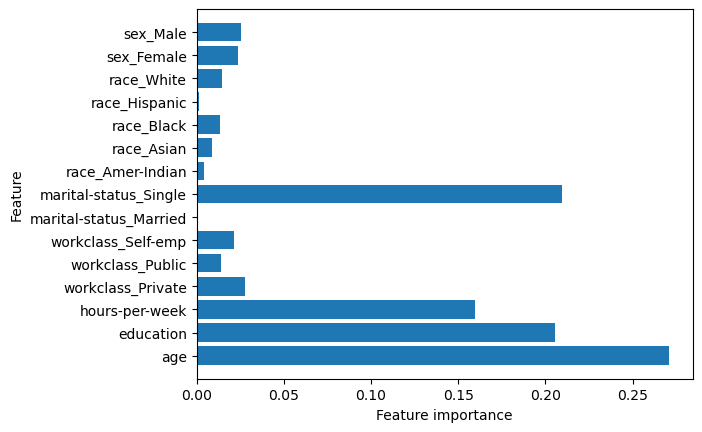

In [289]:
X_trainDF,X_testDF,y_trainDF, y_testDF = train_test_split(df_dummies_drop,target_df, test_size=.2, random_state=42)
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treeclf, len(X_trainDF.columns), X_trainDF.columns)

Looking at the differences between the training and testing set, the training set has a significantly higher accuracy than the training set. This is a sign of overfitting in the model. I suspect this is because the decision tree was built with the default parameters which resulted in overfitting. There has also been no pruning done.

In [261]:
treeclf1 = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 10, max_depth = 4)
treeclf1 = treeclf1.fit(X_train1, y_train1)



In [262]:
print (treeclf1.score(X_train1, y_train1))

0.8177712843671139


In [263]:
print (treeclf1.score(X_test1, y_test1))

0.8125331917153479


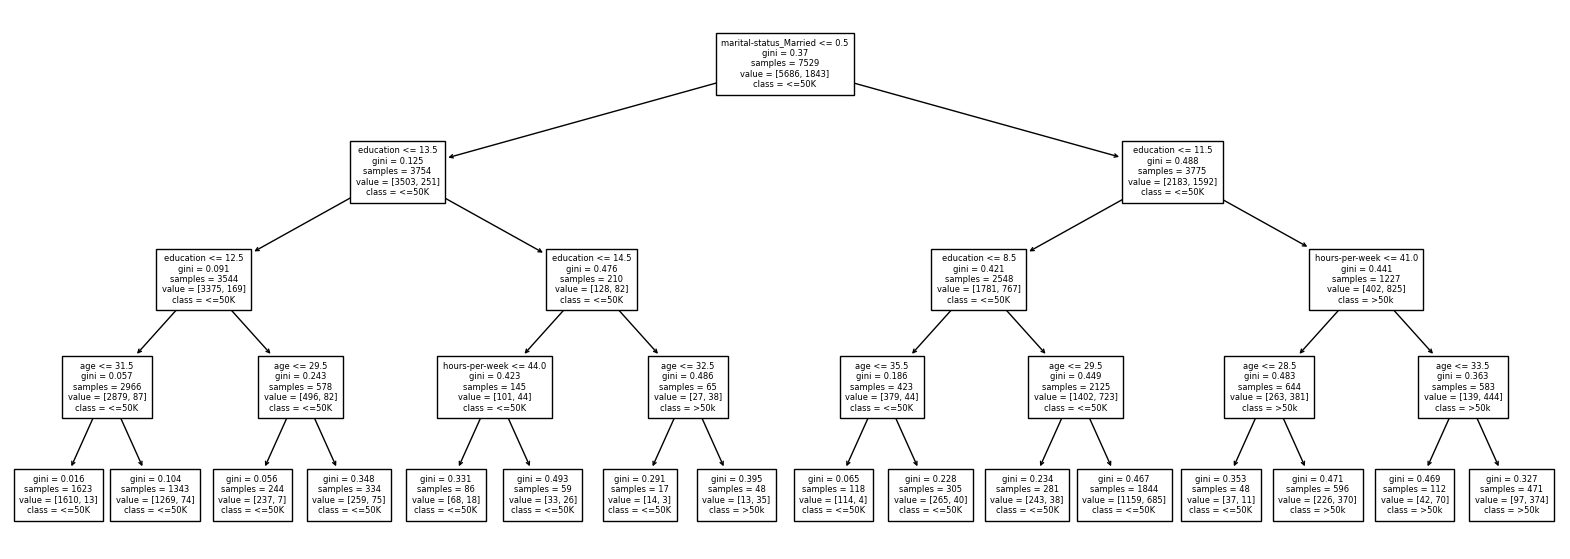

In [325]:
plt.figure(figsize=(20,7))
tree.plot_tree(treeclf1, fontsize = 6,feature_names = feature_list,class_names = class_list)

plt.show()

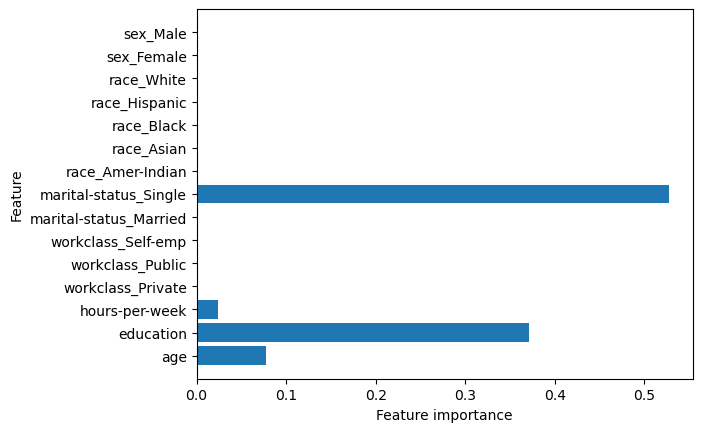

In [286]:
X_trainDF,X_testDF,y_trainDF, y_testDF = train_test_split(df_dummies_drop,target_df, test_size=.2, random_state=42)
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treeclf1, len(X_trainDF.columns), X_trainDF.columns)

This model is better. The test data prediction is more accurate, but the models prediction on both the test and training set is very close. These changes indicate that the parameter changes fixed the overfitting. Also, from the feature importance chart we can see that being married is the most significant feature. Before changing the parameters though, age was the most important feature

#### Naive Bayes

In [291]:
from sklearn import model_selection

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(X_train1, y_train1)
print ("Score on Training: ", nbclf.score(X_train1, y_train1))
print ("Score on Test: ", nbclf.score(X_test1, y_test1))

Score on Training:  0.7160313454642051
Score on Test:  0.7334041423260754


In [296]:
cv_scores = model_selection.cross_val_score(nbclf, X_train1, y_train1, cv=10)
cv_scores

array([0.7184595 , 0.73439575, 0.69322709, 0.7436919 , 0.73705179,
       0.68393094, 0.69853918, 0.72111554, 0.70385126, 0.71276596])

In [297]:
np.mean(cv_scores)

0.714702890565398

#### LDA

In [288]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(X_train1, y_train1)
print ("Score on Training: ", ldclf.score(X_train1, y_train1))
print ("Score on Test: ", ldclf.score(X_test1, y_test1))

Score on Training:  0.8094036392615221
Score on Test:  0.8098778544875199


In [298]:
cv_scores = model_selection.cross_val_score(ldclf, X_train1, y_train1, cv=10)
cv_scores

array([0.80345286, 0.81142098, 0.80212483, 0.8247012 , 0.83001328,
       0.79282869, 0.79548473, 0.82337317, 0.78618858, 0.80984043])

In [299]:
np.mean(cv_scores)

0.807942873894493

Comparing the average accuracy of the cross validations, the original score is very similar (less than 1% difference). LDA is also about 10% more accurate from the training sets.

#### with test data:

In [306]:
LDACorrect = 0
LDAPredict = []
for i in range(len(X_test1)):
    x = ldclf.predict([X_test1[i]])
    if x == y_test1[i]:
        LDACorrect+=1
        LDAPredict.append(x)
    else:
        LDAPredict.append(x)
LDACorrect/len(X_test1)
        

0.8098778544875199

Using the test data to test the accuracy of the models prediction, LDA gives an 80% accuracy of prediction which is similar to the accuracy of the model on the training data. It doesnt say on the question to use both models. So I decided to use LDA since it had a higher accuracy. I could do Naive Bayes as well and it would be more or less the same code but justchange ldclf to nbclf. But since the question says to use the model I chose LDA as my model. I'm sorry if I misunderstood that but just wanted to clarify it here.